## EDA ON TITANIC DATASET

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('titanic.csv')


In [3]:
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.shape

(891, 12)

### finding and handling missing values

In [5]:
# finding all missing values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# handling missing values

data['Age'] = data['Age'].fillna(0)

data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,NaN,Q


In [7]:
# removing rows where cabin value is null
# becuase too many values in cabin is null and it can affect the data analysis if filled with some random/fixed values

data = data.dropna()

data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


#### Some Statistical Measures of titanic data

In [8]:
data.describe()

# gives mathematical calculated values on data -> mean, min, max, standard deviaton, percentile values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,32.318911,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,18.181940,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,21.250000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,33.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [9]:
data.dtypes

# gives the types of data each column holds

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Data Visualization on Features

### Visualizing survived 

Text(0.5, 1.0, 'BarChart for Survival Count')

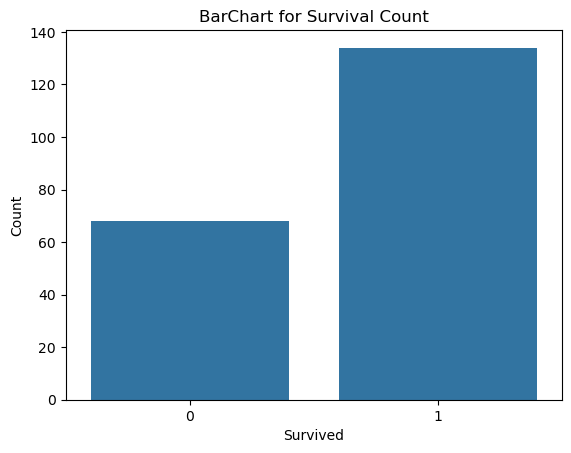

In [10]:
# visualises people survived or not using categorical barchart plot

sns.countplot(x='Survived', data=data)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('BarChart for Survival Count')

<Axes: xlabel='Survived', ylabel='count'>

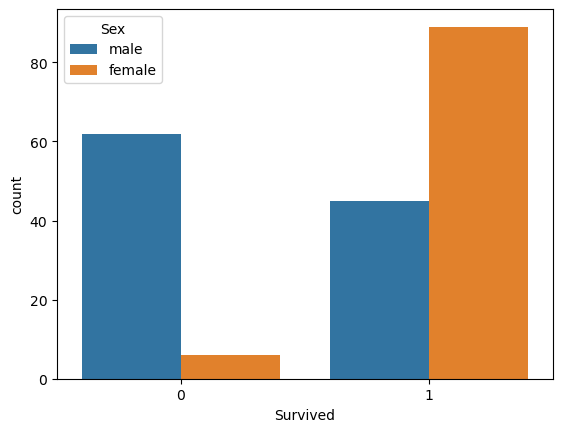

In [11]:
## vizualises people survived based on gender

sns.countplot(x='Survived', hue='Sex', data=data)

##### Analysis from above graph:

Males had a much higher death rate.
Females had a higher survival rate.



### Finding Distribution of Age of passengers on the titanic ship

Text(0.5, 1.0, 'Distribution of age')

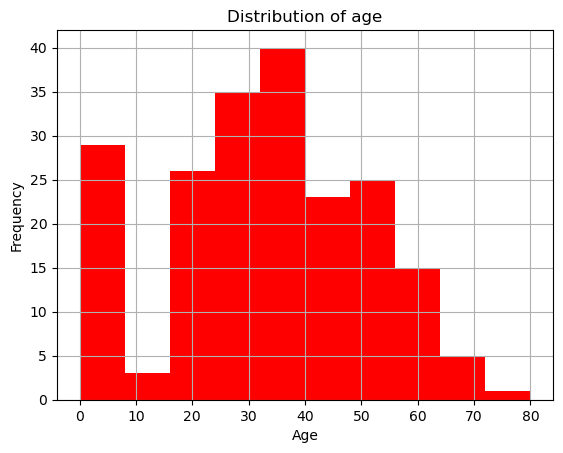

In [12]:
data['Age'].hist(bins=10, color = 'red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age')

##### The above histogram shows the distirbution of age group of people

### Scatter Plot on age and fare

Text(0.5, 1.0, 'Relationship b/w Age and Fare')

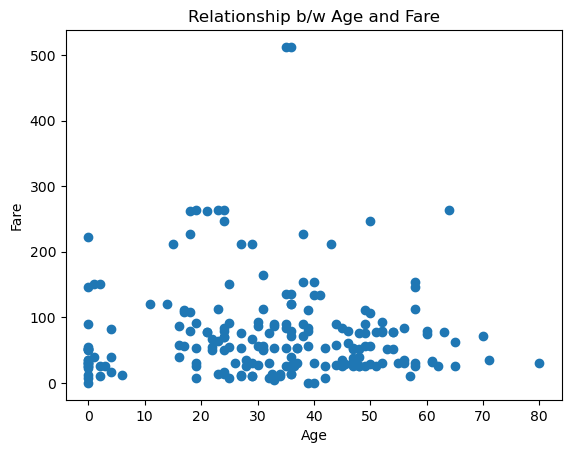

In [13]:
plt.scatter(data['Age'], data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Relationship b/w Age and Fare')

##### We can interpret that age does not affect the fare price (random scattered plotting)

### EXPLORING  RELATIONSHIP through Correlation analysis

In [14]:
# Co-relation analysis
corr_age = data[['Age', 'Fare']].corr()
corr_age

# gives correlation matrix

,Age,Fare
Age,1.000000,-0.011906
Fare,-0.011906,1.000000


No Strong Relationship Between Age and Fare

The value -0.012 is very close to 0, meaning Age and Fare are almost independent.



#### Correlation b/w ticket price and PassengerClass feature

In [15]:
# corrleation b/w ticekt price and class

corr_cabin = data[['Pclass', 'Fare']].corr()

corr_cabin

,Pclass,Fare
Pclass,1.00000,-0.31174
Fare,-0.31174,1.00000


##### Interpretation:

Correlation = -0.3 -> negative correlation
This means as Pclass increases, the Fare decreases.



Text(0, 0.5, 'Fare')

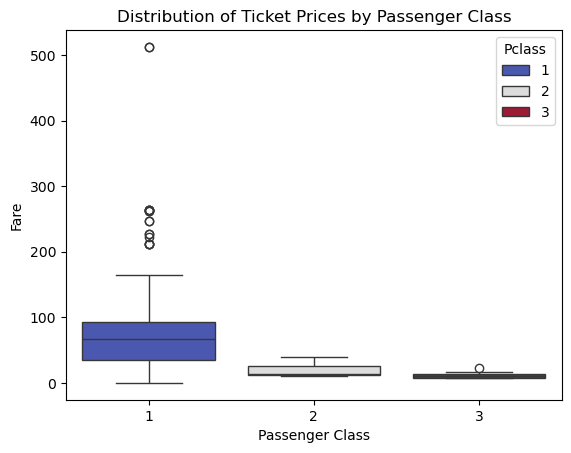

In [16]:

# Visualizing the Correlation b/w 'Fare' and 'pclass'

sns.boxplot(x='Pclass', y='Fare', data=data, hue='Pclass', palette='coolwarm')
plt.title("Distribution of Ticket Prices by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")



##### Interpretation from Boxplot:

1st class paid highest prices.
2nd class paid medium.
3rd class paid lowest prices.


Dots outside whiskers represents Outliers (indicating some people bought expensive tickets in 1st class).


In [17]:
# Cross-tabulation
cross_tab = pd.crosstab(data['Pclass'], data['Survived'])
cross_tab

Survived,0,1
Pclass,,
1,59,115
2,3,13
3,6,6


##### Insights :


First-Class passengers had the highest survival rate.


Third-Class passengers had the lowest survival rate.


In [18]:
 ###  Visualize the Cross-tab Data Using a Stacked Bar Chart

Text(0.5, 1.0, 'Survival Count Across Passenger Classes')

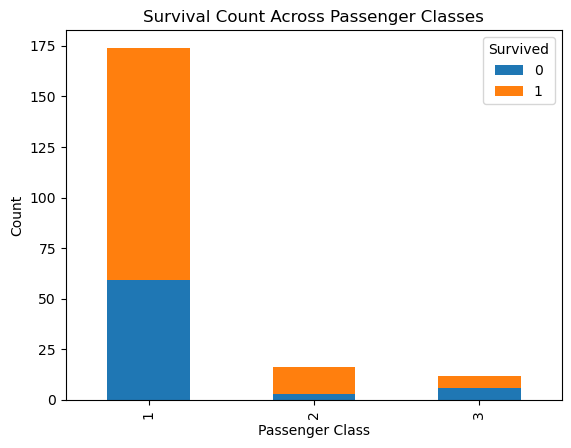

In [19]:
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival Count Across Passenger Classes")



##### Final Insights
:Survival chances were highly dependent on passenger class 

In [20]:
# Cross-tabulation with gender included
cross_tab_gender = pd.crosstab([data['Pclass'], data['Sex']], data['Survived'], normalize='index') * 100
cross_tab_gender.columns = ['Did Not Survive (%)', 'Survived (%)']
cross_tab_gender 



Did Not Survive (%)  Survived (%)
Pclass Sex                                      
1      female             3.797468     96.202532
       male              58.947368     41.052632
2      female            10.000000     90.000000
       male              33.333333     66.666667
3      female            33.333333     66.666667
       male              66.666667     33.333333

##### Insights:

This shows more females survived than male passengers in all Passenger classes.

### Feature Selection

#### Removing irrelevevant features

In [21]:
# Drop unnecessary columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


print(data.head())



    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
1          1       1  female  38.0      1      0  71.2833        C
3          1       1  female  35.0      1      0  53.1000        S
6          0       1    male  54.0      0      0  51.8625        S
10         1       3  female   4.0      1      1  16.7000        S
11         1       1  female  58.0      0      0  26.5500        S


In [22]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

#### Insights from Titanic Dataset after Data Analysis:

1. Dataset contained null/ missing values , which were handled.
2. Females had a much higher survival rate than male.
3. Pclass (1st Class) had the highest survival rate, while 3rd Class had the lowest.
